<H2>
<B><CENTER>MARKETING ANALYTICS</CENTER></B><BR><BR>

Implement KNN classier and experiment with the following concepts

Check the performance of KNN with different distance measures

Check the performance of KNN with binary, categorical & numerical data

#<B>IMPORTING THE PACKAGE</B>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.preprocessing import LabelEncoder
plt.rc('figure',figsize=(20,10))
import plotly.express as ex

#Splitting the data
from sklearn.model_selection import train_test_split

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

#<b>LOADING THE DATA </b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data = data.drop(['userid'], axis=1)
data.head()

age  dob_day  dob_year  ...  mobile_likes_received www_likes  www_likes_received
0   14       19      1999  ...                      0         0                   0
1   14        2      1999  ...                      0         0                   0
2   14       16      1999  ...                      0         0                   0
3   14       25      1999  ...                      0         0                   0
4   14        4      1999  ...                      0         0                   0

[5 rows x 14 columns]

In [ ]:
data.shape

(99003, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    99003 non-null  int64  
 1   dob_day                99003 non-null  int64  
 2   dob_year               99003 non-null  int64  
 3   dob_month              99003 non-null  int64  
 4   gender                 98828 non-null  object 
 5   tenure                 99001 non-null  float64
 6   friend_count           99003 non-null  int64  
 7   friendships_initiated  99003 non-null  int64  
 8   likes                  99003 non-null  int64  
 9   likes_received         99003 non-null  int64  
 10  mobile_likes           99003 non-null  int64  
 11  mobile_likes_received  99003 non-null  int64  
 12  www_likes              99003 non-null  int64  
 13  www_likes_received     99003 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 10.6

<b> There are 14 attributed with 99,003 records

#<b>DATA PREPROCESSING</b>

In [ ]:
data.isnull().sum()

age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

<b>We have the 175 null values in the gender column and 2 null values in the tenure column. <BR> 

</b>

In [ ]:
data=data.dropna()
data.isnull().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<B>There are no null values in the given data.</b>

In [ ]:
data.shape

(98826, 14)

<b>After cleaning the data, there are 98828 records.</b>

In [ ]:
#Checking the number of categorical variables in the data
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


<b>We have only one categorical variable in our data. It is the gender</b>

#<b>EDA ON TARGET VARIABLE</b>

In [ ]:
#Creating the dummy data
df=data
df.head()

age  dob_day  dob_year  ...  mobile_likes_received www_likes  www_likes_received
0   14       19      1999  ...                      0         0                   0
1   14        2      1999  ...                      0         0                   0
2   14       16      1999  ...                      0         0                   0
3   14       25      1999  ...                      0         0                   0
4   14        4      1999  ...                      0         0                   0

[5 rows x 14 columns]

In [ ]:
#Our target variable count
data['gender'].value_counts()

male      58574
female    40252
Name: gender, dtype: int64

<b>In the given data 558,574 are males and 40,252 are females.</b>

In [ ]:
ex.pie(data,names='gender',title='Gender Division propotion in the data')

<b>In the given data 40.7% are female ration and 59.3% are male</b>

In [ ]:
#Label Encoding
label_enc = LabelEncoder()
#data['gender'] = data['gender'].apply(lambda col: label_enc.fit_transform(col))


df['gender']= label_enc.fit_transform(df['gender']) 

In [ ]:
#Our target variable count
df['gender'].value_counts()

1    58574
0    40252
Name: gender, dtype: int64

<b>
1--> Male<br>
0--> Female
</b>

#<B>KNN on binary variable</b>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Splitting the data
x=df.drop(['gender'],1)
y=df['gender']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Standardising the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
scores = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.61868866 0.47467746 0.4706299  0.43632684 0.44852011]
0.48976859409403195


The accuracy score is  not good for the k=5.We are getting the same accuary rate for both manhattan and euclidean distance metric. 

Text(0, 0.5, 'Cross-Validated Accuracy')

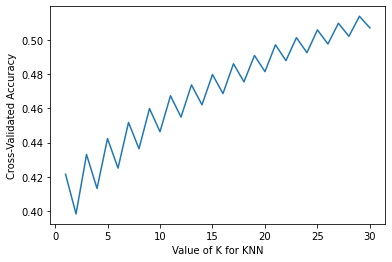

In [ ]:
#Let's test which K is the best. Test K from 1 to 30 and set 10-fold here
k_range = range(1,31)
k_scores = []
for k_number in k_range:
  knn = KNeighborsClassifier(n_neighbors=k_number)
  scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

#Plot
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

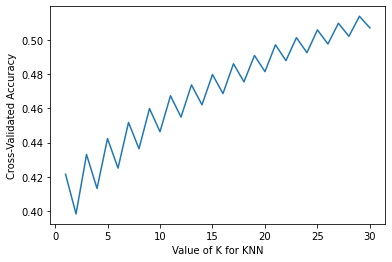

In [ ]:
#Let's test which K is the best. Test K from 1 to 30 and set 10-fold here
#For the Manhaattan distance
k_range = range(1,31)
k_scores = []
for k_number in k_range:
  knn = KNeighborsClassifier(n_neighbors=k_number)
  scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

#Plot
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

<b>For every odd value there s dip in the aaaaccuracy whereas the even values there is raise in the accuary. When k=29 where is hight accuracy. So, lets build a model with k=71</b>

In [ ]:
scores = cross_val_score(knn,x,y,cv=71,scoring='accuracy')
print(scores)
print(scores.mean())

[0.59698276 0.59482759 0.61781609 0.59267241 0.63218391 0.62715517
 0.63505747 0.6487069  0.66810345 0.6566092  0.6487069  0.67816092
 0.60272989 0.69252874 0.65158046 0.66810345 0.66091954 0.63074713
 0.6716954  0.65301724 0.66235632 0.63649425 0.72988506 0.61135057
 0.69109195 0.62571839 0.65158046 0.68965517 0.64367816 0.69899425
 0.62356322 0.66594828 0.69037356 0.60704023 0.7262931  0.65445402
 0.63649425 0.67600575 0.62284483 0.7112069  0.61853448 0.65086207
 0.67528736 0.59913793 0.72772989 0.58333333 0.72701149 0.62715517
 0.66235632 0.67313218 0.65229885 0.67887931 0.73922414 0.61278736
 0.6795977  0.68821839 0.6954023  0.66882184 0.6170977  0.67672414
 0.65301724 0.64511494 0.59698276 0.57543103 0.61637931 0.59956866
 0.53989935 0.50970525 0.48382459 0.44644141 0.47304098]
0.6405117014755347


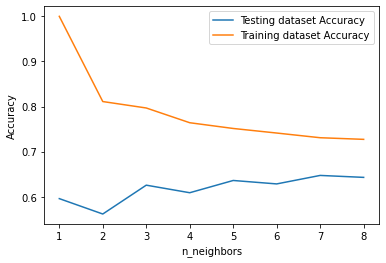

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

<b>We can notice that for the training set as the no.of neighbours increases the accuracy decreases. Whereas, there is fluctuation in the testing data. Therefor, when no.of of neighbours is 3, both training and testing is working better. </b>

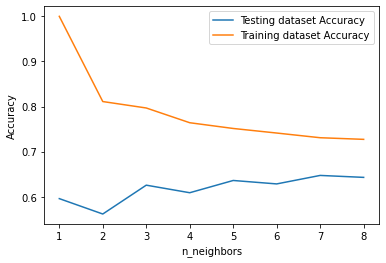

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='jaccard')     #jacard distance
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,metric='jaccard')

In [ ]:
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)[:, 1]

fig = ex.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
#Fitted Model with jacard metrics
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[    0 12063]
 [    0 17585]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12063
           1       0.59      1.00      0.74     17585

    accuracy                           0.59     29648
   macro avg       0.30      0.50      0.37     29648
weighted avg       0.35      0.59      0.44     29648

Accuracy: 0.5931260118726389


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

<b>The accuracy score is better when compared to jacard distance in binary clustering using KNN.Therefore, or binary classification manhatan performss better than the jacard (on my data). Because, the differences in the data took is more. </b>

#<B>KNN on Categorical variable</b>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Splitting the data
x=data.drop(['gender'],1)
y=data['gender']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Standardising the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

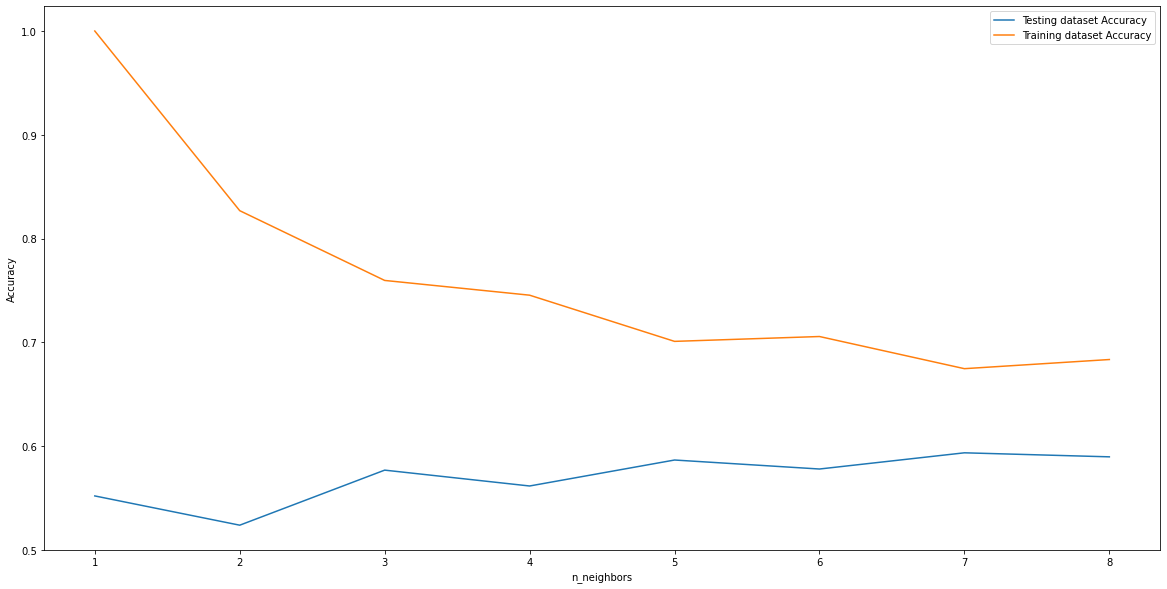

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,metric='hamming')

In [ ]:
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)[:, 1]

fig = ex.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 3113  8950]
 [ 3598 13987]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.26      0.33     12063
           1       0.61      0.80      0.69     17585

    accuracy                           0.58     29648
   macro avg       0.54      0.53      0.51     29648
weighted avg       0.55      0.58      0.54     29648

Accuracy: 0.5767674042093902


#<B>KNN on Numerical Variables</b>

In [ ]:
#Splitting the data
x=data.drop(['friend_count'],1)
y=data['friend_count']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Standardising the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

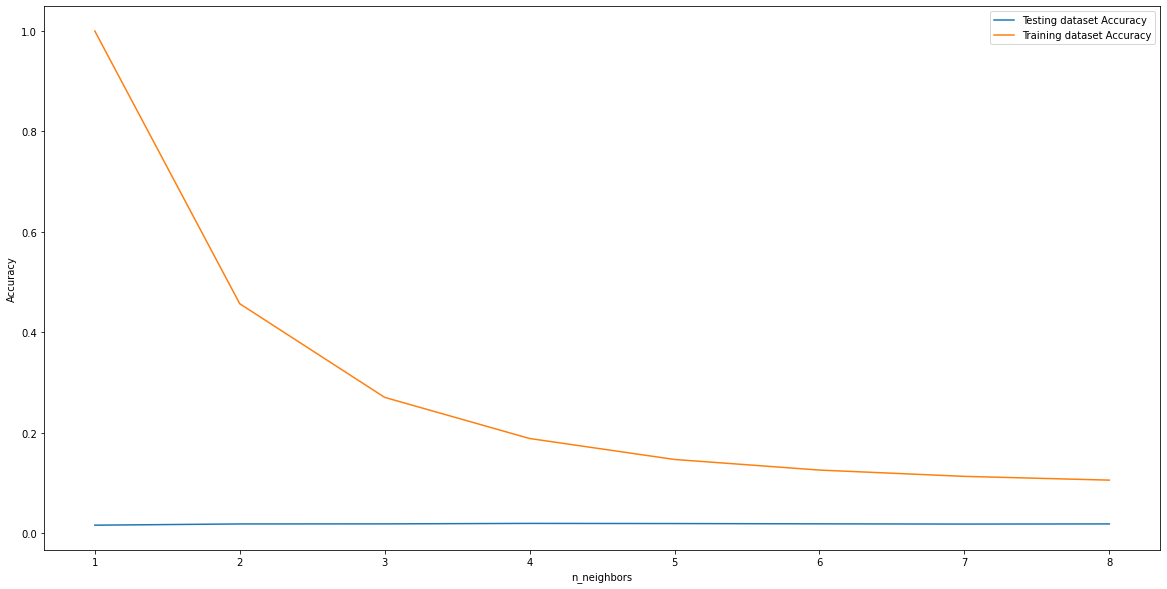

In [ ]:
#Veriying the accuracy score for different k values
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35,metric='manhattan')

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [4 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.04      0.33      0.07        21
         1.0       0.00      0.00      0.00        19
         2.0       0.02      0.11      0.03        27
         3.0       0.00      0.00      0.00        24
         4.0       0.00      0.03      0.01        29
         5.0       0.00      0.00      0.00        27
         6.0       0.00      0.04      0.01        23
         7.0       0.00      0.00      0.00        25
         8.0       0.00      0.00      0.00        25
         9.0       0.00      0.04      0.01        26
        10.0       0.00      0.00      0.00        36
        11.0       0.00      0.00      0.00        30
        12.0       0.00      0.03      0.01        32
        13.0       0.00      0.03      0.01        37
        14.0       0.01     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



<b>KNN doesn't perform good for the numerical data which have different levels i.e', whose unique values are more than 5.</b>

<h1><B>INFERENCE:</H1></B><BR>

1. There are 14 attributed with 99,003 records

2. We have the 175 null values in the gender column and 2 null values in the tenure column.

3. Tried imputing the null values of Gender column using KNNImputer method. But as the method is depricated it is not working.

4. So, I have dropped the null values and worked on the data. Because my data contains 99,003 records, dropping 175 records will not impact my analysis.

5. After cleaning the data, there are 98828 records.

6. We have only one categorical variable in our data. It is the gender.

7. In the given data 40.7% are female ration and 59.3% are male.

8. For binary and categorical classification I'm taking my gender variable as the target variable. Whereas, for the numerical classfication, I am considering friend_count as my target variable.

<br>
<h3><u><B>My Inferences are as follows</u>:-</h3></B>

<H3>
<br>

<b>
<U>BINARY VARIABLE:</B></U>We are getting almost the same accuracy score for both Euclidean and Manhatan distance, whereas for the jacard distance the accuracy score is less.

<br>


<b>
<u>CATEGORICAL VARIABLE:</B></U> The best distance for categorical clustering is Hamming distance. But the draw back by using this method is, its performance time is more. 

<br>
<b><u>NUMERICAL VARIABLE:</b></u> KNN doesn't perform good for the numerical data which have different levels i.e', whose unique values are more than 5.
<br>
<br>


<b><i>NOTE:</B> For all the 3 types of data, the n_neighbours to be conssidered is same, because it depends on the type of data.</i>
